In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Train.csv')

# Show the first few rows
print(df.head())

# Basic info
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0    Male   171.148359    86.185197              151/109   
1    Male   172.946206    79.641937              134/112   
2  Female   155.945488    49.167058              160/101   
3  Female   169.078298    56.017921               133/94   
4  Female   163.758355    73.966304              170/106   

   Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                 259.465814  29.423017                   157.652848   
1                 263.630292  26.626847                   118.507805   
2                 207.846206  20.217553                   143.587550   
3                 253.283779  19.595270                   137.448581   
4                 236.119899  27.582078                   145.328695   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  ...  \
0              0.132868          0.200000             58.786198  ...   
1              0.629534          0.267312             54.63527

# . EDA (Exploratory Data Analysis) & Visualization

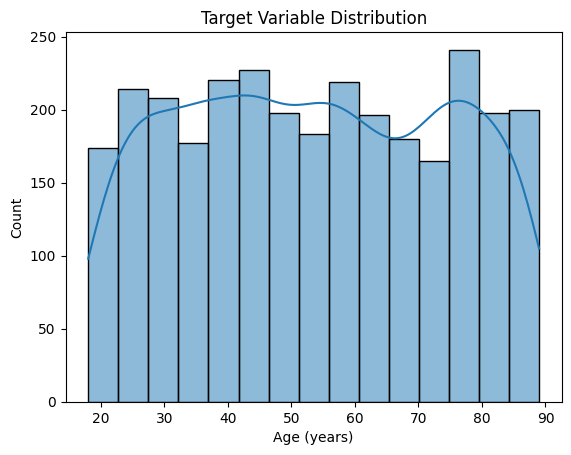

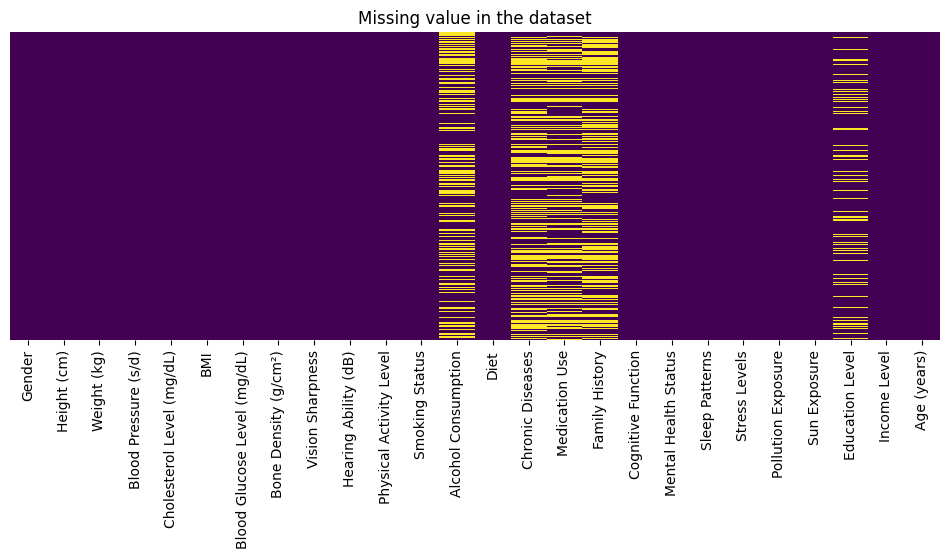

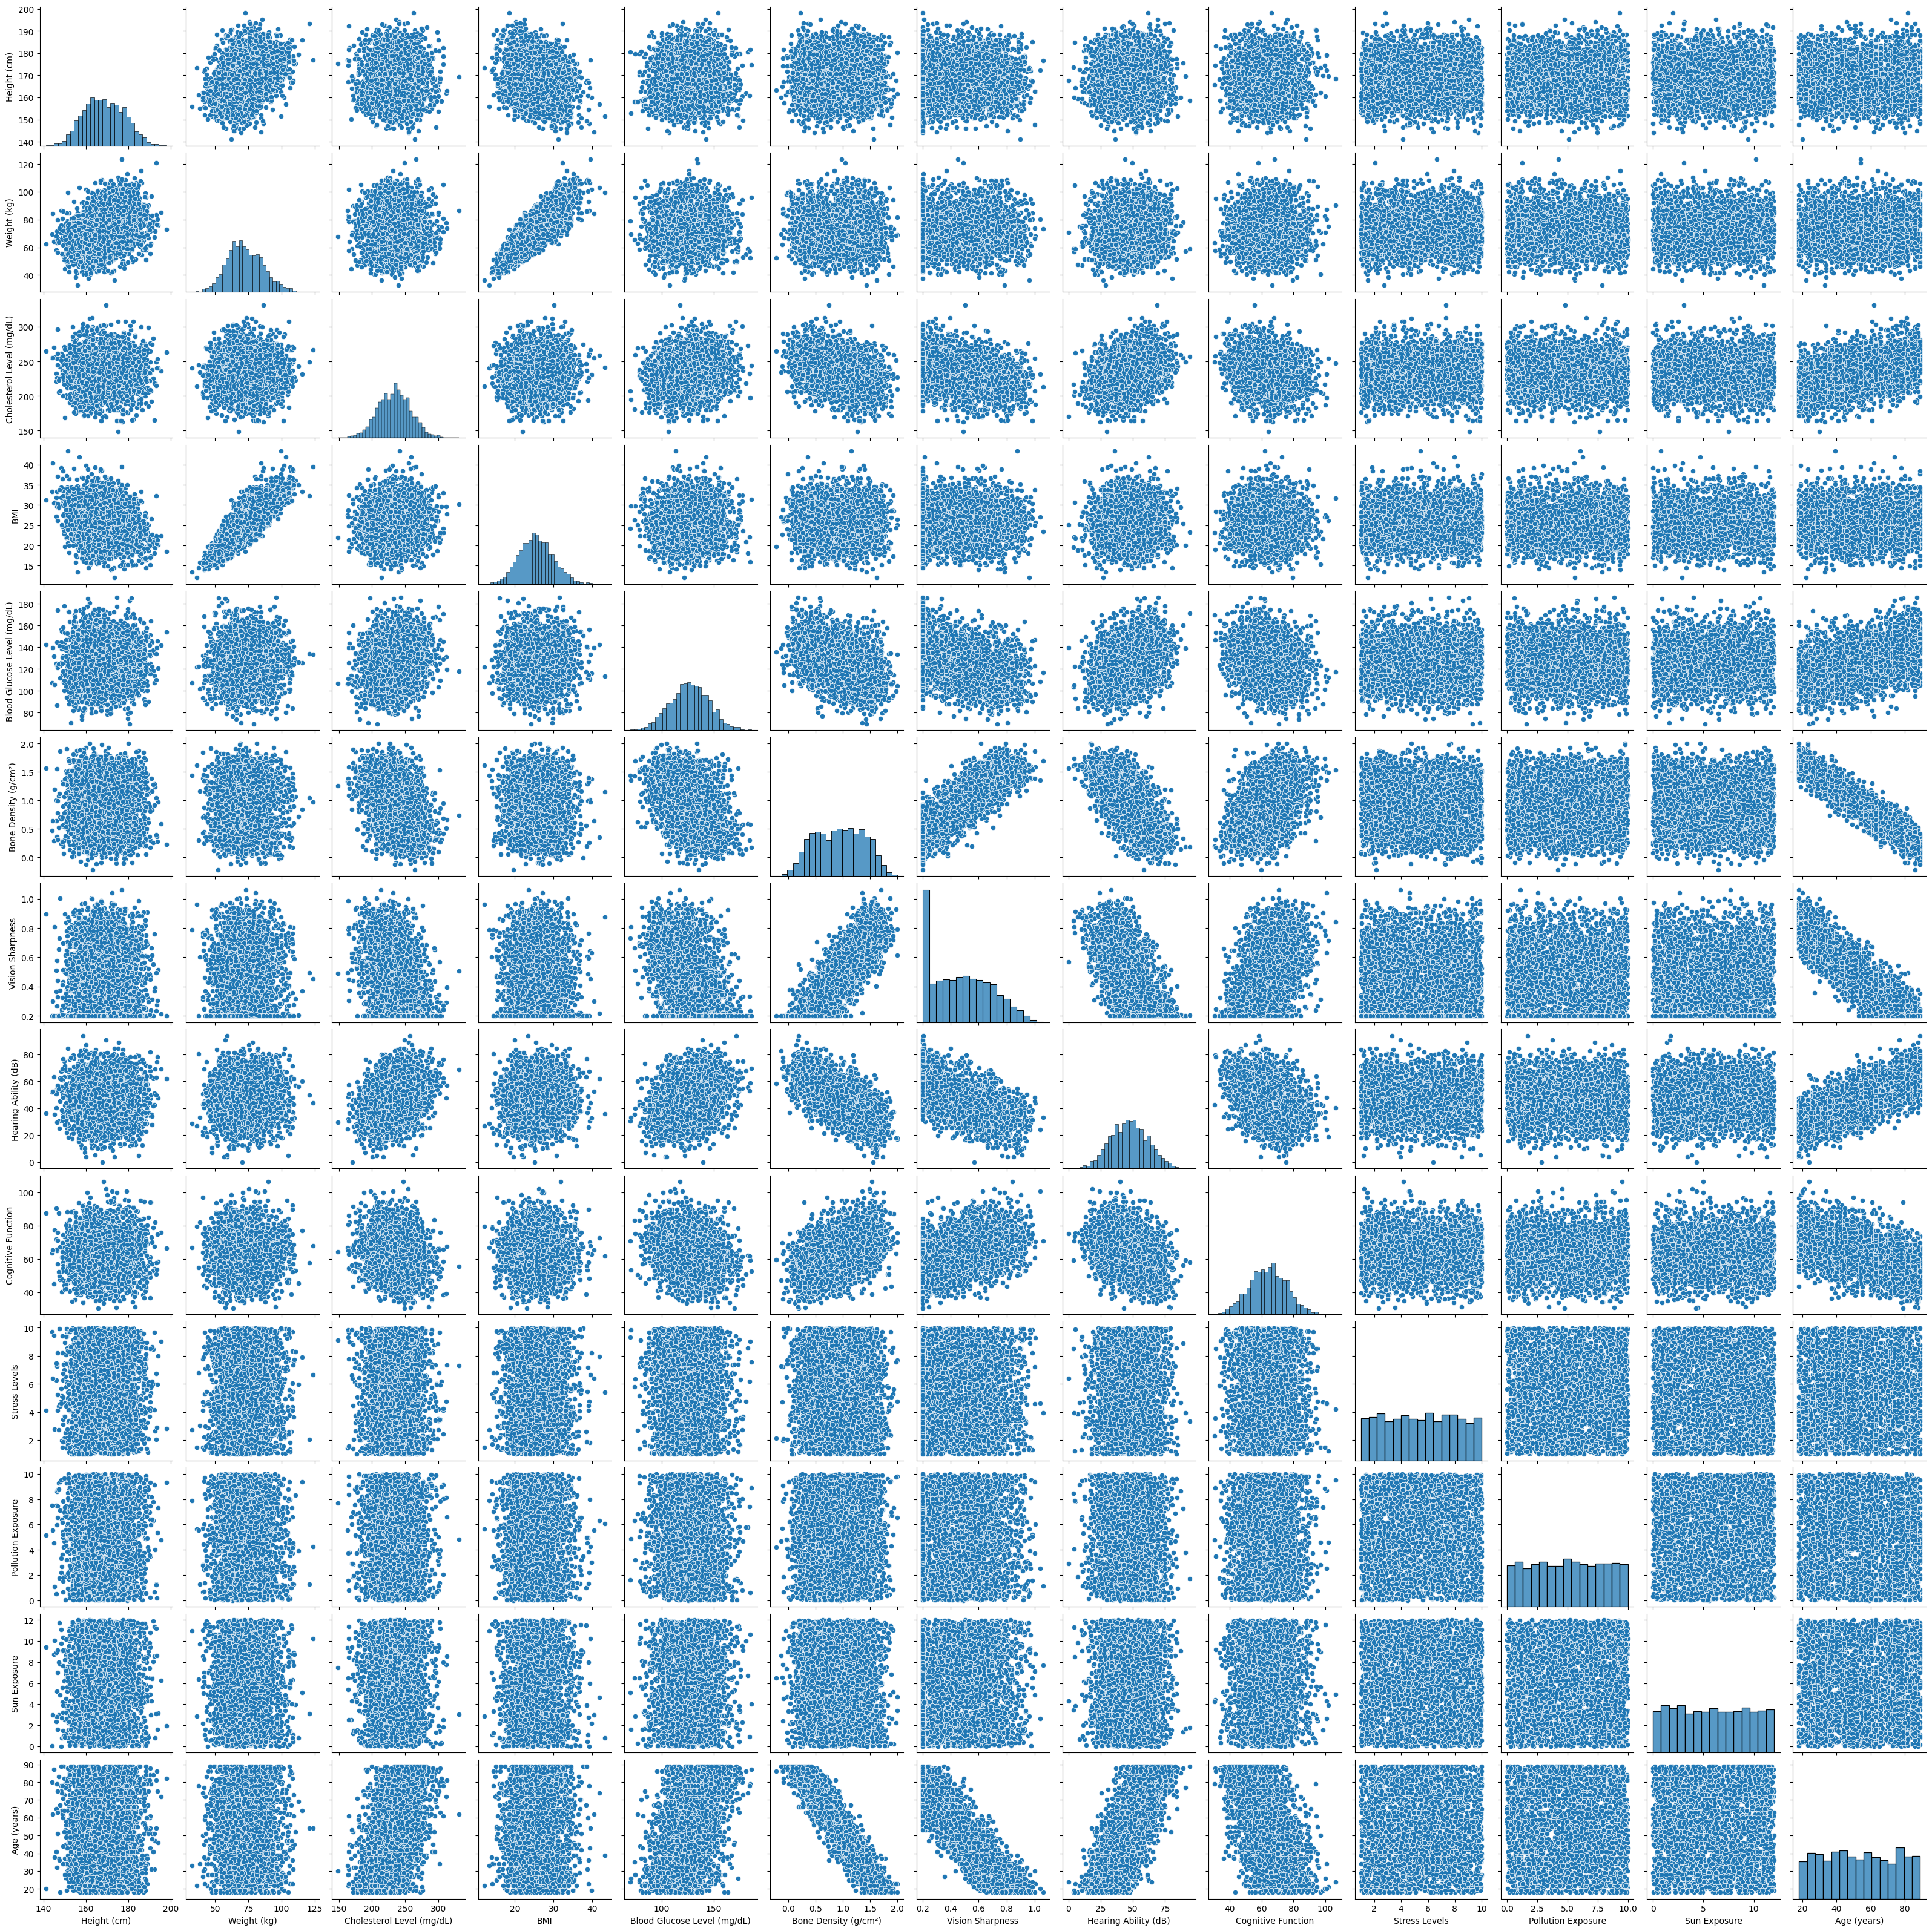

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.histplot(df['Age (years)'], kde=True)  # Replace with your actual target
plt.title("Target Variable Distribution")
plt.show()

plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

# Pairplot for numerical features
sns.pairplot(df.select_dtypes(include='number'))
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_26516\3099603029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette='Set2')


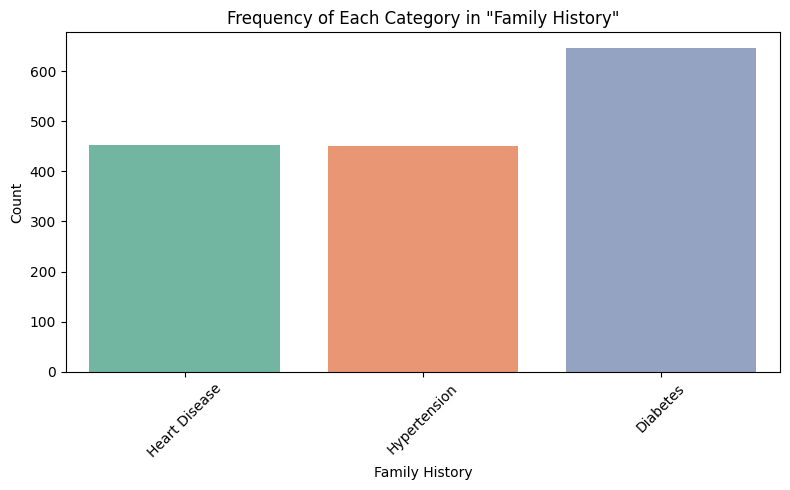

In [4]:
column_name = 'Family History'

# Plot the count of each category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')

plt.title(f'Frequency of Each Category in "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26516\3904925352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column_name, palette='Set2')


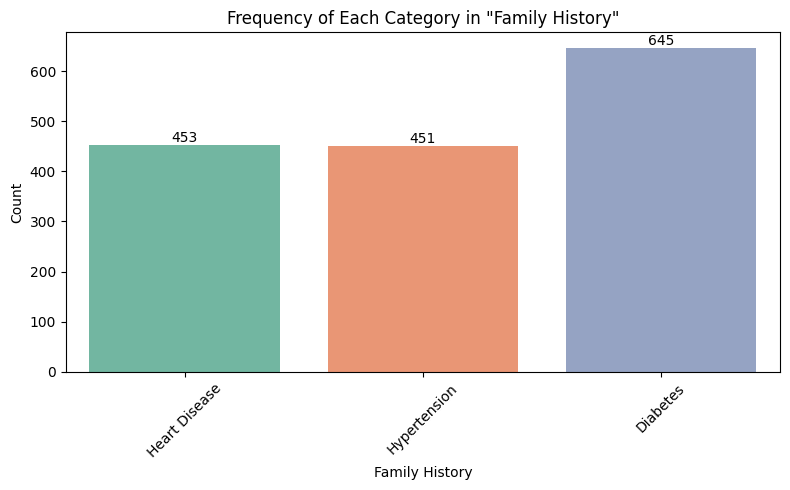

In [5]:

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x=column_name, palette='Set2')

# Add counts above bars
for container in ax.containers:
    ax.bar_label(container)

# Formatting
plt.title(f'Frequency of Each Category in "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  3. Handling Missing Values

In [6]:
# Count missing values
print(df.isnull().sum())

# Example strategies:
# 1. Drop rows
df_dropna = df.dropna()

# 2. Fill with mean (for numerical)
df_filled = df.fillna(df.mean(numeric_only=True))

# 3. Fill with mode (for categorical)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64


#  4. Encoding Categorical Variables

Run conda promt:

conda install -c conda-forge scipy

pip install statsmodels

Let’s assume categorical_cols = ['Gender', 'Education Level', 'Family History'].

Now, for each of these columns:

1. df[col].mode()
Finds the most frequent value (also called the mode) in the column.

For example, if Gender contains: ['Male', 'Male', 'Female', NaN], then mode() returns 'Male'.

2. mode()[0]
.mode() returns a Series, and [0] gets the first most frequent value.

This is important in case there are multiple modes (e.g., a tie between two values).

3. df[col].fillna(...)
Replaces all NaN values in that column with the most frequent value.

This is a common strategy because:

It preserves category balance

It's easy to explain and fast to compute

It avoids creating bias like replacing with an arbitrary value

import pandas as pd
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', None, 'Female', None]
})

mode_val = df['Gender'].mode()[0]
print("Mode:", mode_val)  # Output: 'Female' or 'Male' (depending on frequency)

df['Gender'] = df['Gender'].fillna(mode_val)
print(df)


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm



categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns



# --- 1. Handle Missing Values ---
# Fill numerical with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())



# Fill categorical with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])





# --- 2. Label Encoding ---
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform later if needed




# --- 3. Define Target and Features ---
target = 'Age (years)'
X = df.drop(columns=[target])
y = df[target]




# --- 4. Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# --- 5. Train with statsmodels for Adjustment ---
X_train_sm = sm.add_constant(X_train)  # Add intercept term
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())




# --- 6. Train Linear Regression with scikit-learn ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# --- 7. Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nModel Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R²   (R-squared):                {r2:.2f}")
print(f"MAPE (Mean Absolute % Error):    {mape:.2f}%")



                            OLS Regression Results                            
Dep. Variable:            Age (years)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1360.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        19:19:05   Log-Likelihood:                -7396.6
No. Observations:                2400   AIC:                         1.485e+04
Df Residuals:                    2374   BIC:                         1.500e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Why Adjustments: 

Imagine everyone in a race is running while carrying weights.
If you want to compare who’s fastest fairly, you have to adjust for the weight they're carrying.
Otherwise, the winner might just be the one with the lightest backpack.

That’s exactly what adjustment does — it levels the field so you get the true effect.



When your goal is to explain or understand the effect of individual features, you need to adjust for other variables.

You're asking:

“What is the effect of X on Y, if all other factors are kept constant?”

This is about causal reasoning or fair comparison.


You’re a doctor or researcher studying:

“Does smoking increase age-related deterioration (like hearing loss or lower bone density)?”

You can’t just look at people who smoke and compare their age directly.
Why?

Maybe they also drink more, have poor diets, or live in polluted areas.
So, you need to adjust for those confounders in the regression model — otherwise, you might blame smoking for things it didn’t cause.

This is where statsmodels.OLS() is useful:

It adjusts each variable’s coefficient by accounting for the presence of others

It lets you say:

“Smoking increases biological age by 2.5 years — after adjusting for diet, income, and stress.”

# Full OLS Summary Interpretation for Regression on Age (years)

This document explains every part of the `statsmodels.OLS` summary output in clear language. It includes interpretation of evaluation metrics and regression coefficients using adjustment logic.

---

## Part 1: Explanation of Model Evaluation Metrics

### Basic Model Information

| Term                  | Meaning                                                                                 | Ideal Range or Expectation             |
|-----------------------|-----------------------------------------------------------------------------------------|----------------------------------------|
| No. Observations      | Number of rows or samples in the dataset.                                               | Depends on your dataset                |
| Df Residuals          | Degrees of freedom left after fitting the model = Observations − Parameters.           | Higher is better for estimation        |
| Df Model              | Number of predictor variables used in the model.                                        | Should match number of meaningful features |
| Covariance Type       | How standard errors are computed. "nonrobust" is default; robust options adjust for noise. | Usually “nonrobust” unless stated otherwise |

---

### Model Fit and Significance

| Term                 | Meaning                                                                                 | Ideal Range or Expectation            |
|----------------------|------------------------------------------------------------------------------------------|----------------------------------------|
| R-squared (R²)       | % of variance in the target explained by the model. 0.935 means 93.5% explained.         | Closer to 1.0 is better                |
| Adj. R-squared       | Adjusted R² that penalizes irrelevant predictors. Usually slightly lower than R².       | Close to R² but slightly smaller       |
| F-statistic          | Overall significance test of the model.                                                 | Higher values indicate strong models  |
| Prob (F-statistic)   | p-value for the F-test. If < 0.05, the model is statistically significant.              | Should be < 0.05                       |

---

### Model Comparison Scores

| Term             | Meaning                                                                                 | Ideal Range                         |
|------------------|------------------------------------------------------------------------------------------|--------------------------------------|
| Log-Likelihood   | Measure used to calculate AIC/BIC. Not interpreted alone.                                | Higher (less negative) is better     |
| AIC              | Penalized log-likelihood. Lower = better model.                                           | Use to compare models                |
| BIC              | Like AIC but with stronger penalty for complexity.                                        | Use to compare models                |

---

### Coefficient Table Column Meanings

| Column             | Interpretation                                                                                   |
|--------------------|--------------------------------------------------------------------------------------------------|
| coef               | Effect of the feature on the target, after adjusting for all others.                             |
| std err            | The uncertainty of the coefficient. Smaller = more reliable.                                     |
| t                  | Test statistic (coef / std err). Used to compute p-value.                                        |
| P>|t|              | p-value: If < 0.05, the feature has a statistically significant impact.                          |
| [0.025, 0.975]     | 95% confidence interval for the coefficient. If it includes 0, effect may not be real.           |

---

### Example Interpretation

If model says:
Height (cm): coef = -0.12, p = 0.095



It means:

- Taller individuals may be predicted as slightly younger (by 0.12 years per cm),
- But since p = 0.095 > 0.05, we cannot be statistically confident in this result.

---

## Part 2: Feature-by-Feature Explanation (Adjusted)

All values are **adjusted**, meaning they reflect the feature's impact **while holding all other features constant**.

### Statistically Significant Features (p < 0.05)

| Feature                  | Coef     | Interpretation                                                                  |
|--------------------------|----------|----------------------------------------------------------------------------------|
| Blood Pressure (s/d)     | +0.0038  | Each unit increase in BP adds about 0.0038 years to predicted age.              |
| Cholesterol              | +0.0332  | Higher cholesterol is independently associated with older age.                 |
| Blood Glucose Level      | +0.0341  | High glucose significantly increases predicted age.                            |
| Bone Density             | -24.34   | Strong inverse relationship. Lower density → older age.                        |
| Vision Sharpness         | -29.65   | Better vision → younger predicted age.                                          |
| Hearing Ability          | +0.1416  | More hearing loss (in dB) → older age.                                          |
| Cognitive Function       | -0.0599  | Higher brain performance is associated with younger age.                        |

### Marginally Significant Features (0.05 < p < 0.1)

| Feature              | Coef     | Interpretation                                                                 |
|----------------------|----------|---------------------------------------------------------------------------------|
| BMI                  | -0.4461  | Slight tendency for people with lower BMI to be older.                         |
| Physical Activity    | +0.2547  | Older adults may engage in more structured activity. Not strongly significant. |
| Height / Weight      | -0.12 / +0.14 | Effects exist but are weak; could cancel out or be correlated.            |

### Not Significant Features (p > 0.1)

These features have **no meaningful adjusted impact** on age:

- Gender
- Smoking, Alcohol, Diet
- Chronic Diseases, Medication, Family History
- Mental Health, Sleep, Stress
- Pollution Exposure, Sun Exposure
- Education Level, Income Level

They may seem important before adjustment but don’t matter once we control for clinical health indicators.

---

## Residual and Model Diagnostics

| Term                 | Meaning                                                                 | Ideal Range                 |
|----------------------|-------------------------------------------------------------------------|-----------------------------|
| Omnibus              | Test for normal distribution of residuals.                             | Closer to 0 is better       |
| Prob(Omnibus)        | p-value for Omnibus. > 0.05 means residuals likely follow a normal curve. | > 0.05 is good              |
| Jarque-Bera (JB)     | Normality test. Confirms Omnibus result.                               | Smaller = more normal       |
| Prob(JB)             | p-value for JB. > 0.05 means normally distributed.                     | > 0.05                      |
| Skew                 | Symmetry of residuals. 0 is perfectly symmetrical.                      | Between -0.5 and +0.5       |
| Kurtosis             | Measures outlier tendency. Normal = 3.                                 | Between 2.5 and 3.5         |
| Durbin-Watson        | Checks if residuals are autocorrelated. Ideal = 2.                     | 1.5 to 2.5 is acceptable     |
| Condition Number     | Detects multicollinearity. High = strong correlation between predictors. | < 30 is safe; > 1000 is risky |

---

## Final Summary

- This model is very strong, explaining 93.5% of the variation in Age.
- Clinical variables (bone density, vision, hearing, glucose) are the strongest predictors.
- Demographic or lifestyle features like gender, smoking, or education become unimportant after controlling for health.
- Residuals are well-behaved (normal, symmetric, no patterns).
- The model shows signs of multicollinearity (high condition number), so check VIFs if you're doing inference.


